# Computational Intelligence
## Assignment - 2

##### Github link :
written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

# Task

<hr>


```
Contents
0. Problem Formulation
1. Task 1 - Reaction forces at acceleration = 0 on horizontal plane
2. Task 2 - Reaction forces on Inclined plane
3. Task 3 -
4. Task 4 -
5. Task 5 -
```

<hr>

## 0. Problem formulation

Assume that you have a walking robot standing on 4 feet. We model the robot as a point-mass with four reaction forces acting on it:

$$
\left\{\begin{array}{l}
m \ddot{\mathbf{r}}_{c}=\mathbf{f}_{1}+\mathbf{f}_{2}+\mathbf{f}_{3}+\mathbf{f}_{4}+m \mathbf{g} \\
0=\sum_{i=1}^{4}\left(\mathbf{r}_{i}-\mathbf{r}_{C}\right) \times \mathbf{f}_{i}
\end{array}\right.
$$

where $\mathbf{r}_{C} \in \mathbb{R}^{3}$ is the position of the center of mass of the robot, $\mathbf{f}_{i} \in \mathbb{R}^{3}$ are the reaction forces, $\mathbf{r}_{i} \in \mathbb{R}^{3}$ are position of the feet, $m$ is the mass of the robot, and $\mathbf{g}=\left[\begin{array}{c}0 \\ 0 \\ -9.8\end{array}\right]$ is gravitational vector.

We additionally assume that the reaction forces lie in the friction cone, with friction coefficient $\mu$.

<hr>

## Task-1

### 1. Given $\mathbf{r}_{C}$, and $\mathbf{r}_{i}$ find if there exit reaction forces that allow the robot to maintain static stability (1) with $\ddot{\mathbf{r}}_{c}=0$, given that the robot stands on horizontal ground.

if $\ddot{\mathbf{r}}_{c}=0$ we get the following:

$$
\left\{\begin{array}{l}
0=\mathbf{f}_{1}+\mathbf{f}_{2}+\mathbf{f}_{3}+\mathbf{f}_{4}+m \mathbf{g} \\
0=\sum_{i=1}^{4}\left(\mathbf{r}_{i}-\mathbf{r}_{C}\right) \times \mathbf{f}_{i}
\end{array}\right.
$$

for the Cross Product we can use the skew symmetric matrix as follows:
\begin{equation}
\begin{bmatrix}
\mathbf{a}
\end{bmatrix}
=
\begin{bmatrix}
0 & -\mathbf{a_3} & \mathbf{a_2} \\
\mathbf{a_3} & 0 & -\mathbf{a_1} \\
-\mathbf{a_2} & \mathbf{a_1} & 0 \\
\end{bmatrix}
\end{equation}

We also know the constraint of friction:  $\left\|\mathbf{E}_{t}^{\top} \mathbf{f}_{i}\right\| \leq \mu \mathbf{e}_{n}^{\top} \mathbf{f}_{i}$
where $\mathbf{E}_{t}$ is orthonormal basis in the tangential space to the surface; and $\mathbf{e}_{n}$ is the normal vector of the surface.

In [763]:
# Import all the libraries
import cvxpy as cp
from scipy.linalg import null_space
import numpy as np
import random
from matplotlib import pyplot as plt
import math

# Length and width of the robot
L = 50
W = 30

# our normal vector to the xy plane
normal_vector = np.array([[0], [0], [1]])

# we take left null space to get the plane orthogonal to the normal vector
plane = null_space(normal_vector.T)
print("Left null space of normal vector ", normal_vector.ravel(), "\n is the span of the plane normal to the normal vector \n", plane)

Left null space of normal vector  [0 0 1] 
 is the span of the plane normal to the normal vector 
 [[ 0. -1.]
 [ 1.  0.]
 [ 0.  0.]]


In [738]:
def generate_random_points(x0, y0, r):
    """To generate random points in a circle of radius r with center x0, y0
    :param x0, y0: Center of the circle
    :param r: Radius of the circle"""
    # Generate a random angle between 0 and 2*pi radians
    theta = random.uniform(0, 2*math.pi)
    # Calculate the coordinates of a point on the circle
    x = x0 + r*math.cos(theta)
    y = y0 + r*math.sin(theta)
    return [x, y]

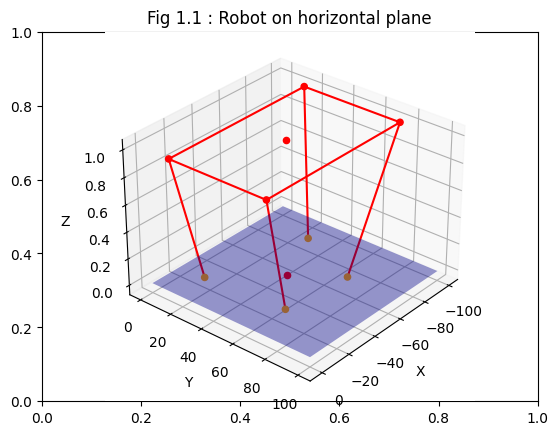

In [752]:

# Generate random 2d points for four legs of the robot
r2d = np.array([generate_random_points(25, 25, 10),
                 generate_random_points(75, 75, 10),
                 generate_random_points(25, 75, 10),
                 generate_random_points(75, 25, 10)])


# Generate the centre of those random points as rc (centre of the robot)
rc_2d = np.array([np.average(r2d[:,0]), np.average(r2d[:,1])])

# Position of legs of the robot
r = r2d[:, 0].reshape(4, 1) * plane[:, 0] + r2d[:, 1].reshape(4, 1) * plane[:, 1]

# Position of the centre of the chassis of the robot
rc = rc_2d[0] * plane[:, 0] + rc_2d[1] * plane[:, 1] + 1*normal_vector.ravel()

# Plot the plain, legs, and chassis of the robot
fig = plt.figure()
plt.title('Fig 1.1 : Robot on horizontal plane')
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0:100:2j, 0:100:2j]
x = 0 + u*plane[0, 0] + v*plane[0, 1]
y = 0 + u*plane[1, 0] + v*plane[1, 1]
z = 0 + u*plane[2, 0] + v*plane[2, 1]

# Plot the robots points of contact on the ground
ax.scatter(r[:, 0], r[:, 1], r[:, 2], color='orange', alpha=1)

# Plot the chassis points
dim = np.array([[rc[0] + L, rc[1] - W, rc[2]],
                [rc[0] - L, rc[1] + W, rc[2]],
                [rc[0] - L, rc[1] - W, rc[2]],
                [rc[0] + L, rc[1] + W, rc[2]]])
ax.scatter(dim[:, 0], dim[:, 1], dim[:, 2], color="red", alpha=1)

# Draw the legs
for i in range(4):
    ax.plot([r[i,0], dim[i,0]], [r[i,1], dim[i, 1]], [r[i, 2], dim[i, 2]], color='red')


# Draw the boundaries of the robot chassis
ax.plot([dim[0, 0], dim[2, 0]], [dim[0, 1], dim[2, 1]], [dim[0, 2], dim[2, 2]], color='red')
ax.plot([dim[1, 0], dim[2, 0]], [dim[1, 1], dim[2, 1]], [dim[1, 2], dim[2, 2]], color='red')
ax.plot([dim[1, 0], dim[3, 0]], [dim[1, 1], dim[3, 1]], [dim[1, 2], dim[3, 2]], color='red')
ax.plot([dim[0, 0], dim[3, 0]], [dim[0, 1], dim[3, 1]], [dim[0, 2], dim[3, 2]], color='red')


# Plot the projection of rc (center) point of the robot on the ground
v = rc
dist = v@normal_vector
rc_proj = v - dist*normal_vector.ravel()
ax.scatter(rc_proj[0], rc_proj[1], 0, color='red')
ax.scatter(rc[0], rc[1], rc[2], color='red')

# Plot the surface of the Plane on which the robot is standing
ax.plot_surface(x, y, z, color='blue', alpha=0.4)

# Set up the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30, 40)
plt.show()


In [753]:

# Declare the variables and constants
f1 = cp.Variable((3, 1))
f2 = cp.Variable((3, 1))
f3 = cp.Variable((3, 1))
f4 = cp.Variable((3, 1))

m = 10  # Mass of the robot in Kg
meu = 0.8   # Friction coefficient
mg = m*np.array([0, 0, -9.81]).reshape(3, 1)    # mg

skew_symm_matrix = lambda a: np.array([[0, -a[2], a[1]],
                                       [a[2], 0, -a[0]],
                                       [-a[1], a[0], 0]])

objective = cp.Minimize(0)
constraints = [f1 + f2 + f3 + f4 + mg == 0,
               skew_symm_matrix(r[0]-rc) @ f1 +
               skew_symm_matrix(r[1]-rc) @ f2 +
               skew_symm_matrix(r[2]-rc) @ f3 +
               skew_symm_matrix(r[3]-rc) @ f4 == 0,
               cp.norm2(plane.T @ f1) <= meu * normal_vector.T @ f1,
               cp.norm2(plane.T @ f2) <= meu * normal_vector.T @ f2,
               cp.norm2(plane.T @ f3) <= meu * normal_vector.T @ f3,
               cp.norm2(plane.T @ f4) <= meu * normal_vector.T @ f4]

cp.Problem(objective, constraints).solve()
if f1.value is not None:
    print("The Robot is stable, the forces are:")
    print("f1 = ", f1.value.ravel())
    print("f2 = ", f2.value.ravel())
    print("f3 = ", f3.value.ravel())
    print("f4 = ", f4.value.ravel())
    print("at friction coeff = ", meu)
else:
    print("Robot is unstable")
    print("at friction coeff = ", meu)

The Robot is stable, the forces are:
f1 =  [-0.          0.         24.37470423]
f2 =  [ 0.         -0.         24.26094464]
f3 =  [-0.         0.        24.7067411]
f4 =  [-0.          0.         24.75761002]
at friction coeff =  0.8


<hr>

## Task-2

### 2. Solve the previous problem, but assume that the robot stands on tilted ground.

Here we only need to update the normal vector and corresponding span of the plane orthogonal to the normal vector and that's it! Other things remain same.

In [727]:
# tilting the normal vector randomly
n2 = normal_vector.ravel() + np.array([random.sample(range(0, 3), 3)]).ravel()

In [728]:
n2 = n2.reshape(3, 1)

In [746]:
print("The normal vector after the random tilt = ", n2.ravel())

The normal vector after the random tilt =  [0 1 3]


In [754]:
# Generating the span of plane orthogonal to the vector normal to it using left null space
tilt_plane = null_space(n2.T)

In [755]:
print("Span of the plane orthogonal to the normal vector ", n2.ravel(), "\n is \n", tilt_plane)

Span of the plane orthogonal to the normal vector  [0 1 3] 
 is 
 [[-0.31622777 -0.9486833 ]
 [ 0.9        -0.3       ]
 [-0.3         0.1       ]]


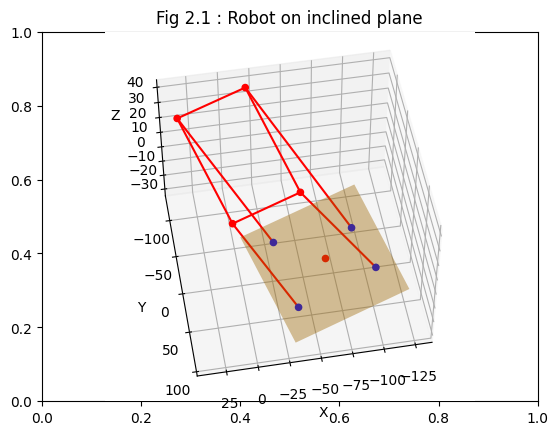

In [762]:
r2d = np.array([generate_random_points(25, 25, 10),
                 generate_random_points(75, 75, 10),
                 generate_random_points(25, 75, 10),
                 generate_random_points(75, 25, 10)])


#rc_2d= np.array(random.sample(range(30, 60), 2))
rc_2d = np.array([np.average(r2d[:,0]), np.average(r2d[:,1])])

r = r2d[:, 0].reshape(4, 1) * tilt_plane[:, 0] + r2d[:, 1].reshape(4, 1) * tilt_plane[:, 1]
rc = rc_2d[0] * tilt_plane[:, 0] + rc_2d[1] * tilt_plane[:, 1] + 1*n2.ravel()


fig = plt.figure()
plt.title('Fig 2.1 : Robot on inclined plane')
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0:100:2j, 0:100:2j]
x = 0 + u*tilt_plane[0, 0] + v*tilt_plane[0, 1]
y = 0 + u*tilt_plane[1, 0] + v*tilt_plane[1, 1]
z = 0 + u*tilt_plane[2, 0] + v*tilt_plane[2, 1]

ax.scatter(r[:, 0], r[:, 1], r[:, 2], color='blue', alpha=1)


# Length and width of the robot
L = 50
W = 30

# Plot the leg positions
dim = np.array([[rc[0] + L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] + W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] + L, rc[1] + W*np.sin(30), rc[2]]])

dim1 = dim[:, 0].reshape(4, 1)*tilt_plane[:, 0] + dim[:, 1].reshape(4, 1)* tilt_plane[:, 1] + dim[:, 2].reshape(4, 1)*n2.ravel()/100
ax.scatter(dim1[:, 0], dim1[:, 1], dim1[:, 2], color="red", alpha=1)



# Draw the legs
ax.plot([r[0,0], dim1[1,0]], [r[0,1], dim1[1, 1]], [r[0, 2], dim1[1, 2]], color='red')
ax.plot([r[2,0], dim1[2,0]], [r[2,1], dim1[2, 1]], [r[2, 2], dim1[2, 2]], color='red')
ax.plot([r[3,0], dim1[3,0]], [r[3,1], dim1[3, 1]], [r[3, 2], dim1[3, 2]], color='red')
ax.plot([r[1,0], dim1[0,0]], [r[1,1], dim1[0, 1]], [r[1, 2], dim1[0, 2]], color='red')


# Draw the boundaries of the robot chassis
ax.plot([dim1[0, 0], dim1[2, 0]], [dim1[0, 1], dim1[2, 1]], [dim1[0, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[2, 0]], [dim1[1, 1], dim1[2, 1]], [dim1[1, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[3, 0]], [dim1[1, 1], dim1[3, 1]], [dim1[1, 2], dim1[3, 2]], color='red')
ax.plot([dim1[0, 0], dim1[3, 0]], [dim1[0, 1], dim1[3, 1]], [dim1[0, 2], dim1[3, 2]], color='red')


# Plot the projection of rc (center) point of the robot
v = rc
dist = v@n2
rc_proj = v - dist*n2.ravel()
#ax.scatter(rc_proj[0], rc_proj, 0, color='red')
ax.scatter(rc[0], rc[1], rc[2], color='red')


# Plot the surface of the Plane on which the robot is standing
ax.plot_surface(x, y, z, color='orange', alpha=0.4)

# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(50, 80)
plt.show()

In [760]:

# Declare the variables and constants
f1 = cp.Variable((3, 1))
f2 = cp.Variable((3, 1))
f3 = cp.Variable((3, 1))
f4 = cp.Variable((3, 1))

m = 10  # Mass of the robot in Kg
meu = 0.8   # Friction coefficient
mg = m*np.array([0, 0, -9.81]).reshape(3, 1)    # mg

# Skew symmetric matrix for computing cross product
skew_symm_matrix = lambda a: np.array([[0, -a[2], a[1]],
                                       [a[2], 0, -a[0]],
                                       [-a[1], a[0], 0]])

# run the problem with all the constraints
obj = cp.Minimize(0)
constraints = [f1 + f2 + f3 + f4 + mg == 0,
               skew_symm_matrix(r[0]-rc) @ f1 +
               skew_symm_matrix(r[1]-rc) @ f2 +
               skew_symm_matrix(r[2]-rc) @ f3 +
               skew_symm_matrix(r[3]-rc) @ f4 == 0,
               cp.norm2(tilt_plane.T @ f1) <= meu * n2.T @ f1,
               cp.norm2(tilt_plane.T @ f2) <= meu * n2.T @ f2,
               cp.norm2(tilt_plane.T @ f3) <= meu * n2.T @ f3,
               cp.norm2(tilt_plane.T @ f4) <= meu * n2.T @ f4]

cp.Problem(obj, constraints).solve()
if f1.value is not None:
    print("The Robot is stable, the forces are:")
    print("f1 = ", f1.value.ravel())
    print("f2 = ", f2.value.ravel())
    print("f3 = ", f3.value.ravel())
    print("f4 = ", f4.value.ravel())
    print("at friction coeff = ", meu)
else:
    print("Robot is unstable")
    print("at friction coeff = ", meu)

The Robot is stable, the forces are:
f1 =  [-0.09681701  0.12204439 23.19649988]
f2 =  [ 0.08041971  0.15938325 23.85842466]
f3 =  [-0.09918557 -0.66414814 24.33473385]
f4 =  [ 0.11558287  0.3827205  26.7103416 ]
at friction coeff =  0.8


<hr>

## Task-3

### 3. Solve the previous problem, but assume that one of the feet pushes against a vertical wall instead of standing on the ground.

<hr>

## Task-4

### 4. Solve the previous problem, but assume that one of the feet is nailed to the floor.

<hr>

## Task-5

### 5. Assume a constant external force fe acts on the robot, $\left\|\mathbf{M}\mathbf{F}_{e} + \mathbf{f}_{e,0}\right\| \leq 1$, where $\mathbf{M}$ is positive definite matrix, can you guarantee that the robot will remain stable?